# Analyse commodity price history

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from plotting import Prices, gp_smoother

Load all price history from a specified start date

In [2]:
prices = Prices(np.datetime64('2021-01-01T00'))
prices.history[0].head()

Loaded 113 files


,Time,0,1,2,3,4,5,6,7
Aerospace Research,2021-01-01 16:59:22,322.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aluminium,2021-01-01 16:59:22,18.40,18.60,18.60,18.7,18.7,20.0,NaN,NaN
Apples,2021-01-01 16:59:22,1.99,2.05,2.15,NaN,NaN,NaN,NaN,NaN
Attitude Control,2021-01-01 16:59:22,1650.00,1660.00,1660.00,1670.0,1690.0,NaN,NaN,NaN
Automotive Research,2021-01-01 16:59:22,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot commodity history by level

Specify which commodity and a list of quality levels that you're interested in

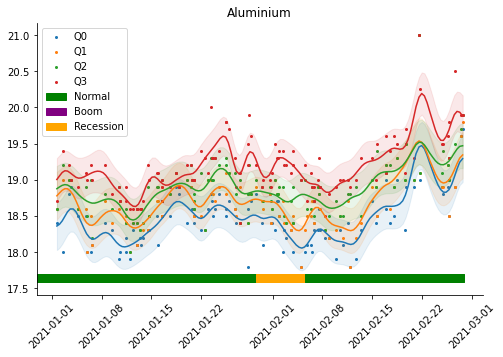

In [4]:
f = plt.figure(figsize=(8,5))
#prices.plot_commodity('Crude Oil', [0, 1, 2, 3])
#prices.plot_commodity('High-grade E-comps', [0, 1, 2, 3])
prices.plot_commodity('Aluminium', [0, 1, 2, 3])
#prices.plot_commodity('Petrol', [0, 1, 2, 3])
sns.despine()
#f.savefig('example.pdf', bbox_inches='tight')

Plot multiple commodities together

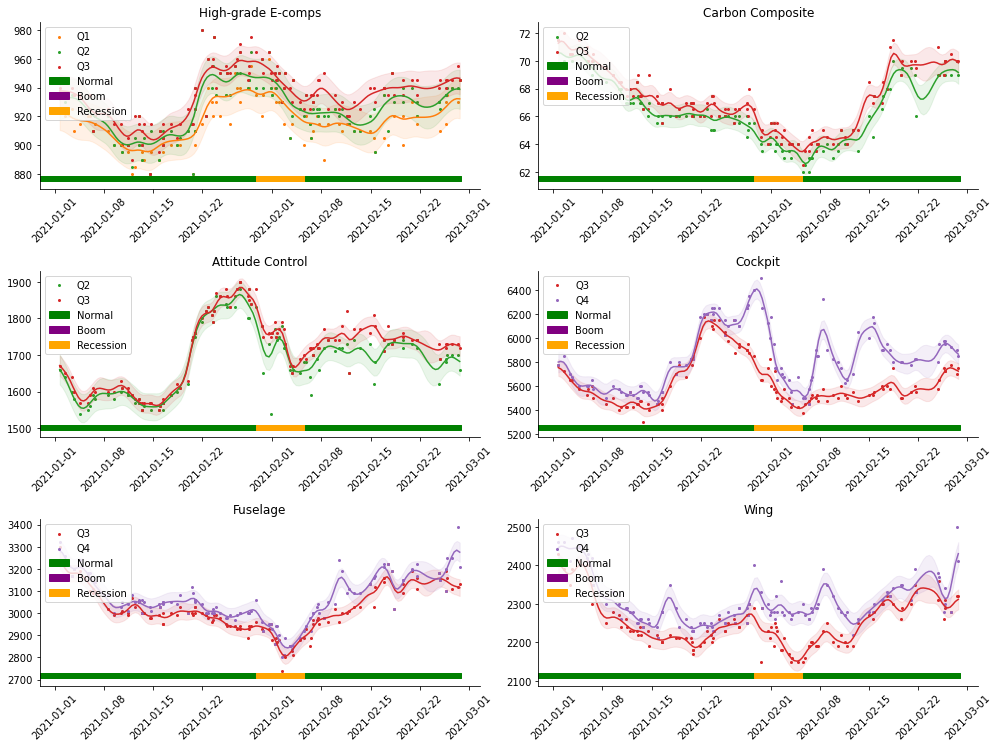

In [14]:
cs = [
    ('High-grade E-comps', [1, 2, 3]),
    ('Carbon Composite', [2, 3]),
    ('Attitude Control', [2, 3]),
    ('Cockpit', [3, 4]),
    ('Fuselage', [3, 4]),
    ('Wing', [3, 4]),
]
num_cs = len(cs)
num_cols = 2
num_rows = int(np.ceil(num_cs / num_cols))

f, axs = plt.subplots(num_rows, num_cols, figsize=(14,3.5*num_rows))
axr = axs.ravel()
for i, (commodity, qs) in enumerate(cs):
    prices.plot_commodity(commodity, qs, axr[i])
plt.tight_layout()
sns.despine()

Research

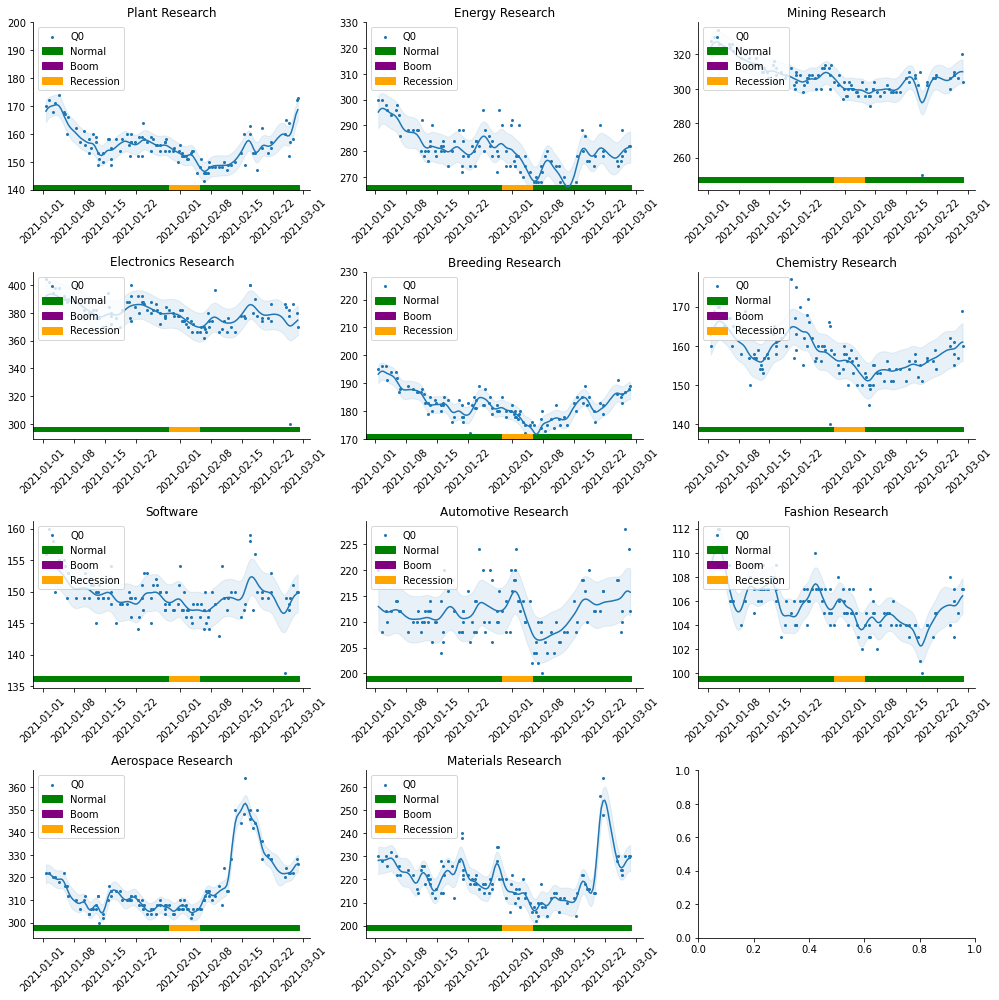

In [6]:
cs = [
    ('Plant Research', [0], [140, 200]),
    ('Energy Research', [0], [265, 330]),
    ('Mining Research', [0], None),
    ('Electronics Research', [0], None),
    ('Breeding Research', [0], [170, 230]),
    ('Chemistry Research', [0], None),
    ('Software', [0], None),
    ('Automotive Research', [0], None),
    ('Fashion Research', [0], None),
    ('Aerospace Research', [0], None),
    ('Materials Research', [0], None),    
]
num_cs = len(cs)
num_cols = 3
num_rows = int(np.ceil(num_cs / num_cols))

f, axs = plt.subplots(num_rows, num_cols, figsize=(14,3.5*num_rows))
axr = axs.ravel()
for i, (commodity, qs, ylims) in enumerate(cs):
    prices.plot_commodity(commodity, qs, axr[i], ylims=ylims)
plt.tight_layout()
sns.despine()

### Opportunity analysis
Compute statistics over the price history, to identify how much current prices deviate from the norm 

In [7]:
prices.get_stats('Aluminium')

,Commodity,Q,Current,Mean,Std,z
0,Aluminium,0,19.7,18.474078,0.397668,3.082779
1,Aluminium,1,19.8,18.694811,0.392995,2.812217
2,Aluminium,2,19.9,18.888096,0.355552,2.846008
3,Aluminium,3,19.9,19.209333,0.414545,1.666085
4,Aluminium,4,19.9,19.533172,0.789061,0.464892


In [8]:
opportunity = pd.concat([prices.get_stats(com, qmax=3) for com in prices.history[0].index])

<AxesSubplot:xlabel='z', ylabel='Commodity'>

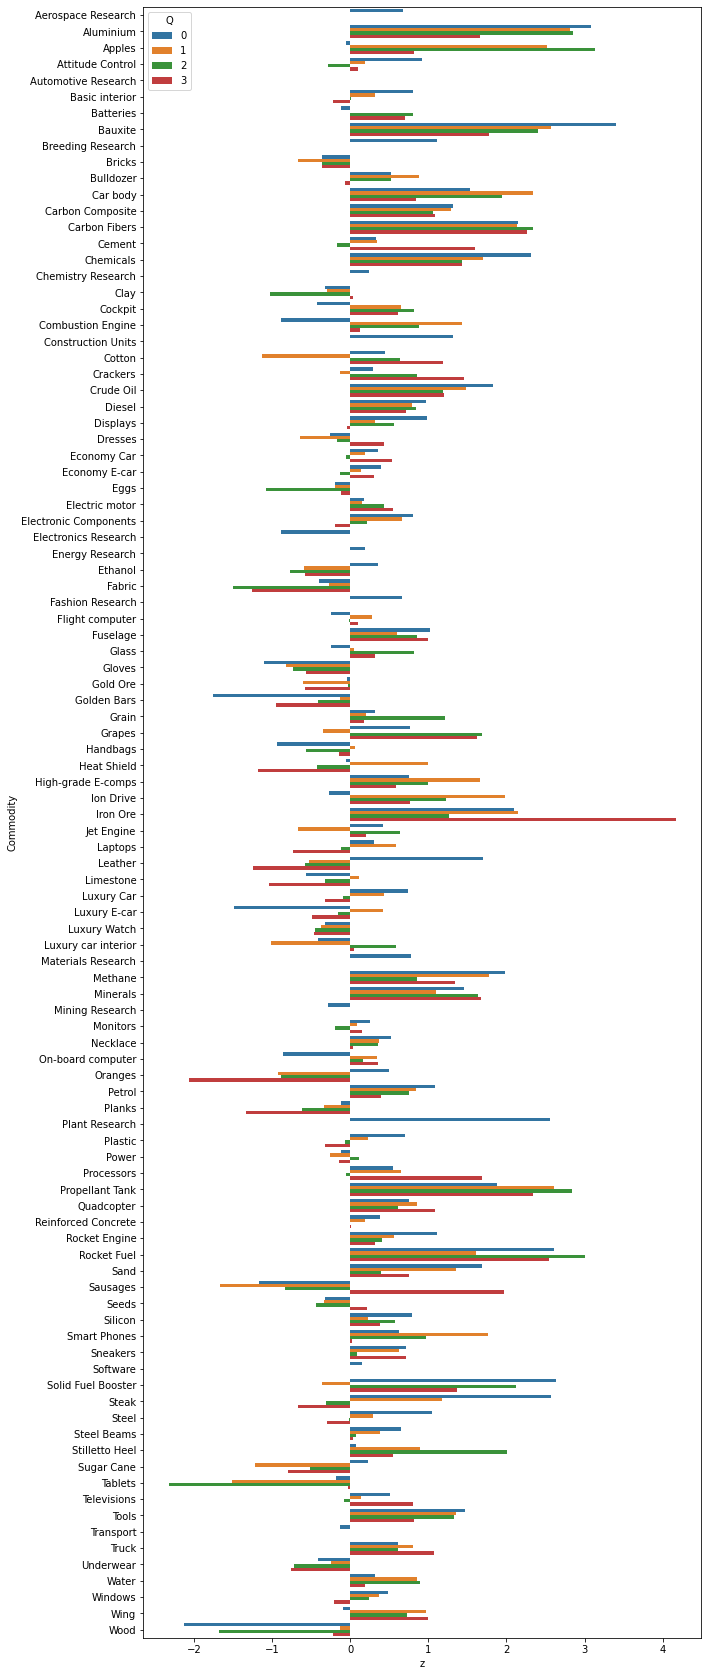

In [9]:
f = plt.figure(figsize=(10,30))
sns.barplot(data = opportunity, y='Commodity', x='z', hue='Q')

Sort the opportunities by lowest z score

In [10]:
opportunity.sort_values('z')

,Commodity,Q,Current,Mean,Std,z
2,Tablets,2,720.00,755.809903,15.420457,-2.322234
0,Wood,0,2.90,3.142553,0.113995,-2.127746
3,Oranges,3,2.00,2.356801,0.173277,-2.059137
0,Golden Bars,0,5850.00,6190.180740,194.241276,-1.751331
2,Wood,2,3.40,3.762601,0.215955,-1.679059
...,...,...,...,...,...,...
2,Rocket Fuel,2,37.00,33.590435,1.135938,3.001542
0,Aluminium,0,19.70,18.474078,0.397668,3.082779
2,Apples,2,2.55,2.063134,0.155138,3.138282
0,Bauxite,0,10.60,9.075315,0.448113,3.402453


Plot the history of a given commodity/quality, annotated with the statistics

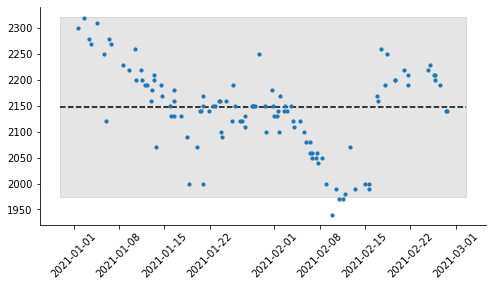

In [11]:
prices.plot_stats('Wing', 0)